<a href="https://colab.research.google.com/github/icygit6/image-processing/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

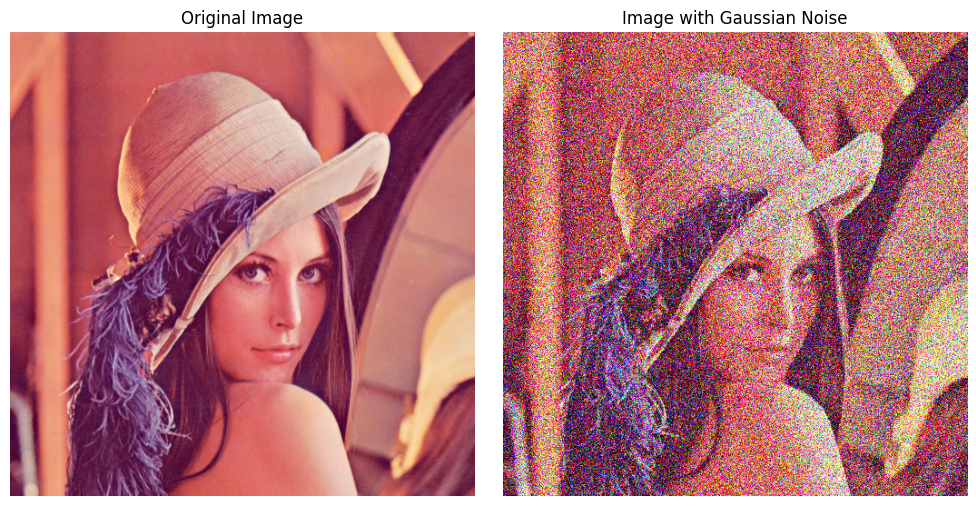

In [ ]:
from skimage import io, util
import matplotlib.pyplot as plt
b = io.imread("/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png")
gn = util.random_noise(b, mode="gaussian", var=0.100)
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.imshow(b, cmap="gray")
ax1.set_title("Original Image")
ax1.axis("off")
ax2 = fig.add_subplot(122)
ax2.imshow(gn, cmap="gray")
ax2.set_title("Image with Gaussian Noise")
ax2.axis("off")
plt.tight_layout()
plt.show()

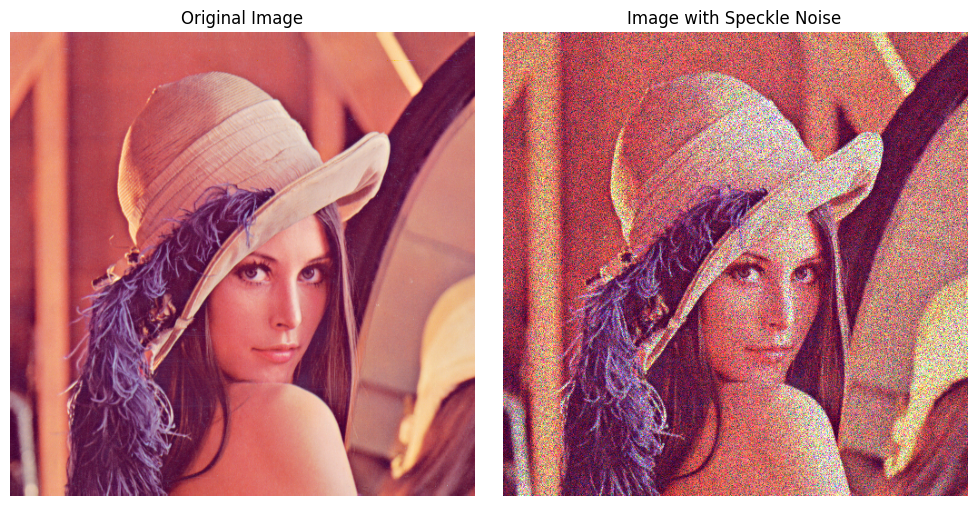

In [ ]:
from skimage import io, util
import matplotlib.pyplot as plt
b = io.imread("/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png")
gn = util.random_noise(b, mode="speckle", var=0.100)
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax1.imshow(b, cmap="gray")
ax1.set_title("Original Image")
ax1.axis("off")
ax2 = fig.add_subplot(122)
ax2.imshow(gn, cmap="gray")
ax2.set_title("Image with Speckle Noise")
ax2.axis("off")
plt.tight_layout()
plt.show()


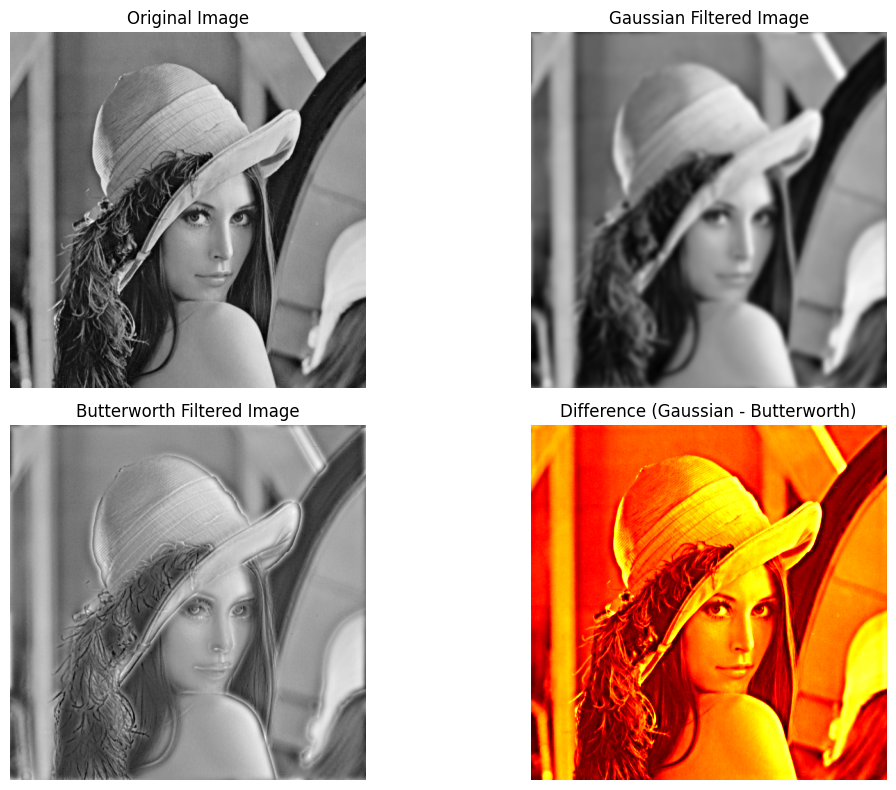

Gaussian Filter Creation Time: 0.01446s
Butterworth Filter Creation Time: 0.01189s
Gaussian Filter Application Time: 0.02669s
Butterworth Filter Application Time: 0.02010s


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2
from time import time

image_path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
lena = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def gaus(shape, cutoff):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)
    y = np.linspace(-0.5, 0.5, rows)
    X, Y = np.meshgrid(x, y)
    radius = np.sqrt(X**2 + Y**2)
    filter = np.exp(-(radius**2) / (2 * (cutoff**2)))
    return filter

def butter(shape, cutoff, order):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)
    y = np.linspace(-0.5, 0.5, rows)
    X, Y = np.meshgrid(x, y)
    radius = np.sqrt(X**2 + Y**2)
    filter = 1 / (1 + (radius / cutoff)**(2 * order))-0.5
    return filter

def lay(image, filter):
    fft_image = fftshift(fft2(image))
    filtered_fft = fft_image * filter
    filtered_image = np.abs(ifft2(ifftshift(filtered_fft)))
    return filtered_image

cutoff = 0.05
butterworth_order = 2

start = time()
gaussian = gaus(lena.shape, cutoff)
gaussian_time = time() - start

start = time()
butterworth = butter(lena.shape, cutoff, butterworth_order)
butterworth_time = time() - start

start = time()
gaussian_filtered = lay(lena, gaussian)
gaussian_apply_time = time() - start

start = time()
butterworth_filtered = lay(lena, butterworth)
butterworth_apply_time = time() - start

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(lena, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Gaussian Filtered Image")
plt.imshow(gaussian_filtered, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("Butterworth Filtered Image")
plt.imshow(butterworth_filtered, cmap="gray")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Difference (Gaussian - Butterworth)")
plt.imshow(np.abs(gaussian_filtered - butterworth_filtered), cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.show()
print(f"Gaussian Filter Creation Time: {gaussian_time:.5f}s")
print(f"Butterworth Filter Creation Time: {butterworth_time:.5f}s")
print(f"Gaussian Filter Application Time: {gaussian_apply_time:.5f}s")
print(f"Butterworth Filter Application Time: {butterworth_apply_time:.5f}s")

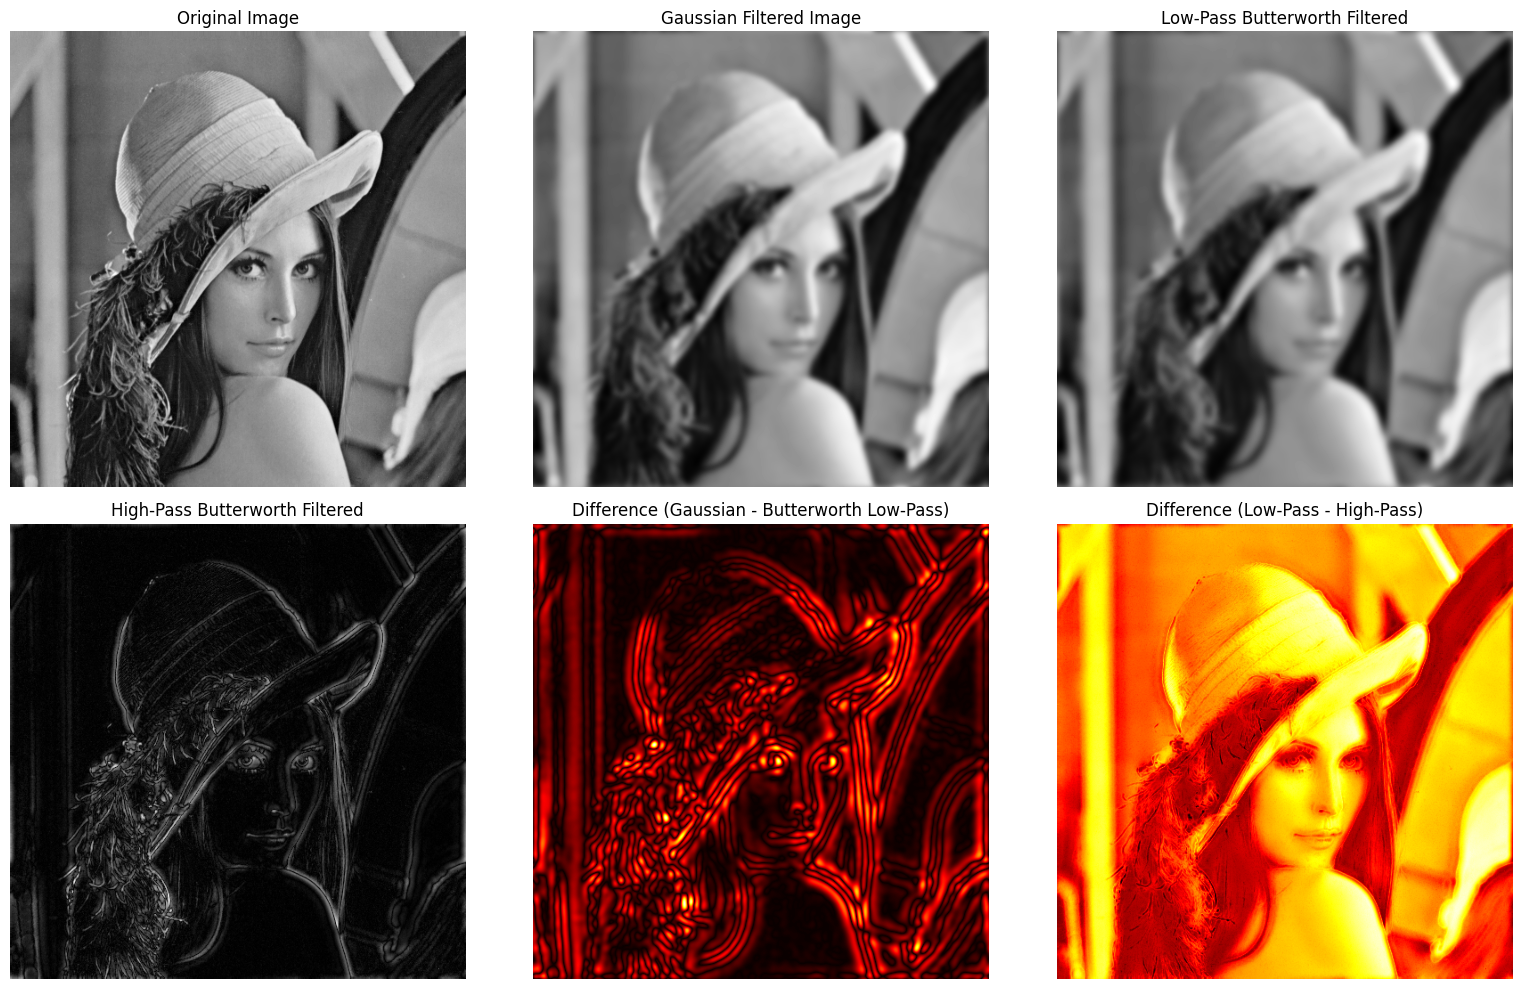

Gaussian Filter Creation Time: 0.00566s
Gaussian Filter Application Time: 0.01712s
Low-Pass Butterworth Filter Creation Time: 0.01076s
Low-Pass Butterworth Filter Application Time: 0.01718s
High-Pass Butterworth Filter Creation Time: 0.01146s
High-Pass Butterworth Filter Application Time: 0.01641s


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2
from time import time
path = "/content/drive/MyDrive/python/IMAGE PROCESSING/lena.png"
lena = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
def gaus(shape, cutoff):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)
    y = np.linspace(-0.5, 0.5, rows)
    X, Y = np.meshgrid(x, y)
    radius = np.sqrt(X**2 + Y**2)
    filter = np.exp(-(radius**2) / (2 * (cutoff**2)))
    return filter

def butter(shape, cutoff, order, filter_type="low"):
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)
    y = np.linspace(-0.5, 0.5, rows)
    X, Y = np.meshgrid(x, y)
    radius = np.sqrt(X**2 + Y**2)
    if filter_type == "low":
        filter = 1 / (1 + (radius / cutoff)**(2 * order))
    elif filter_type == "high":
        filter = 1 / (1 + (radius / cutoff)**(2 * order)) -1
    return filter

def lay(image, filter):
    fft_image = fftshift(fft2(image))
    filtered_fft = fft_image * filter
    filter = np.abs(ifft2(ifftshift(filtered_fft)))
    return filter

cutoff = 0.05
butterworth_order = 2
start = time()
gaussian = gaus(lena.shape, cutoff)
gaussian_time = time() - start

start = time()
gaussian_filtered = lay(lena, gaussian)
gaussian_apply_time = time() - start

start = time()
butterworth_low = butter(lena.shape, cutoff, butterworth_order, filter_type="low")
butterworth_low_time = time() - start

start = time()
butterworth_low_filtered = lay(lena, butterworth_low)
butterworth_low_apply_time = time() - start

start = time()
butterworth_high = butter(lena.shape, cutoff, butterworth_order, filter_type="high")
butterworth_high_time = time() - start

start = time()
butterworth_high_filtered = lay(lena, butterworth_high)
butterworth_high_apply_time = time() - start

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(lena, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Gaussian Filtered Image")
plt.imshow(gaussian_filtered, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Low-Pass Butterworth Filtered")
plt.imshow(butterworth_low_filtered, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.title("High-Pass Butterworth Filtered")
plt.imshow(butterworth_high_filtered, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Difference (Gaussian - Butterworth Low-Pass)")
plt.imshow(np.abs(gaussian_filtered - butterworth_low_filtered), cmap="hot")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("Difference (Low-Pass - High-Pass)")
plt.imshow(np.abs(butterworth_low_filtered - butterworth_high_filtered), cmap="hot")
plt.axis("off")

plt.tight_layout()
plt.show()

print(f"Gaussian Filter Creation Time: {gaussian_time:.5f}s")
print(f"Gaussian Filter Application Time: {gaussian_apply_time:.5f}s")

print(f"Low-Pass Butterworth Filter Creation Time: {butterworth_low_time:.5f}s")
print(f"Low-Pass Butterworth Filter Application Time: {butterworth_low_apply_time:.5f}s")

print(f"High-Pass Butterworth Filter Creation Time: {butterworth_high_time:.5f}s")
print(f"High-Pass Butterworth Filter Application Time: {butterworth_high_apply_time:.5f}s")


**i did a lot of experiment just to get the result so i think that i just post
all of it so that i can use it in the future , i managed to finally finish the task by super many experiments for example just like the formula to find the most suitable mathematical order to each filter . i decided to make it all together inside just one code section because it will be to much of the output that i want to show. i composed the function for each filter in this code section so i can easily use for maybe other task that requires it. i must use very specific naming because it is really will be a problem because of many variables were created in just for this task .the naming will help me to determine which to be editted for the output.i also print the execution time of each process but i will be diferent each time and depends on the runtime type. this is the most stressfull task i have ever had.**